In [198]:
# HIDDEN
Base.displaysize() = (5, 80)

## Visualization Principles Continued

In this section, we discuss principles of visualization for transformation, context, and smoothing.

### Principles of Transformation

The principles of data transformation give us useful ways to alter data for visualization in order to more effectively reveal trends. We most commonly apply data transformations to reveal patterns in skewed data and non-linear relationships between variables.

The plot below shows the distribution of ticket fares for each passenger aboard the Titanic. As you can see, the distribution is skewed right.

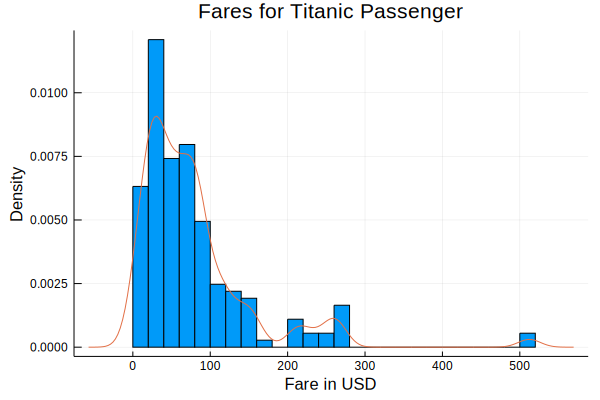

In [25]:
# HIDDEN
using CSV
using DataFrames
using StatsPlots
ti = CSV.read("data/titanic.csv", ignoreemptylines=true);
@df ti histogram(:fare, norm=:pdf, legend=false)
@df ti density!(:fare, legend=false)
title!("Fares for Titanic Passenger")
xlabel!("Fare in USD")
ylabel!("Density")

Although this histogram shows all the fares, it is difficult to see detailed patterns in the data since the fares are clumped on the left side of the histogram. To remedy this, we can take the natural log of the fares before plotting them:

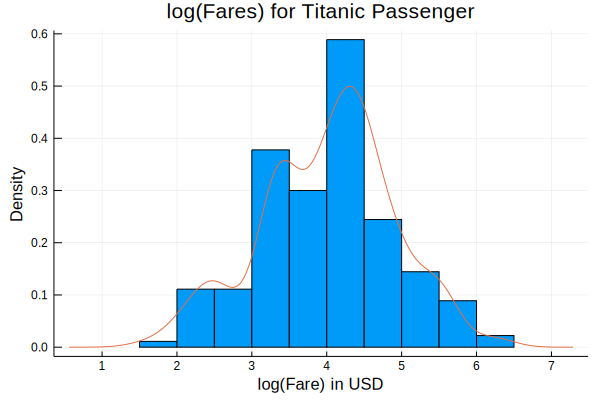

In [33]:
# HIDDEN
histogram(log.(ti[ti.fare .> 0, :fare]), norm=:pdf, legend=false)
density!(log.(ti[ti.fare .> 0, :fare]), legend=false)
title!("log(Fares) for Titanic Passenger")
xlabel!("log(Fare) in USD")
ylabel!("Density")

We can see from the plot of the log data that the distribution of fares has a mode at roughly $ e^2 = \$7.40 $ and a smaller mode at roughly $ e^{3.4} = \$30.00 $. Why does plotting the natural log of the data help with skew? The logarithms of large numbers tend be close to the logarithms of small numbers:

| value | log(value) |
| ----- | ---------- |
| 1     | 0.00       |
| 10    | 2.30       |
| 50    | 3.91       |
| 100   | 4.60       |
| 500   | 6.21       |
| 1000  | 6.90       |

This means that taking the logarithm of right-tailed data will bring large values close to small values. This helps see patterns where the majority of the data lie.

In fact, the logarithm is considered the Swiss army knife of data tranformation—it also helps us see the nature of non-linear relationships between variables in the data. In 1619, Kepler recorded down the following set of data to discover his Third Law of Planetary Motion:

In [64]:
# the method `readtable` is another option for reading delimited files
planets = readtable("data/planets.data", allowcomments=true, commentmark='#', header=true, separator=' ')

,planet,mean_dist,period,kepler_ratio
,String⍰,Float64⍰,Float64⍰,Float64⍰
1,Mercury,0.389,87.77,7.64
2,Venus,0.724,224.7,7.52
3,Earth,1.0,365.25,7.5
4,Mars,1.524,686.95,7.5
5,Jupiter,5.2,4332.62,7.49
6,Saturn,9.51,10759.2,7.43


If we plot the mean distance to the sun against the period of the orbit, we can see a relationship that doesn't quite look linear:

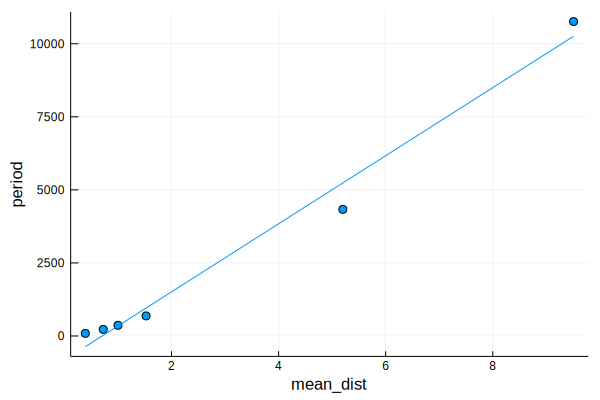

In [39]:
@df planets scatter(:mean_dist, :period, regression=true, xlabel="mean_dist", ylabel="period", legend=false)

However, if we take the natural log of both mean distance and period, we obtain the following plot:

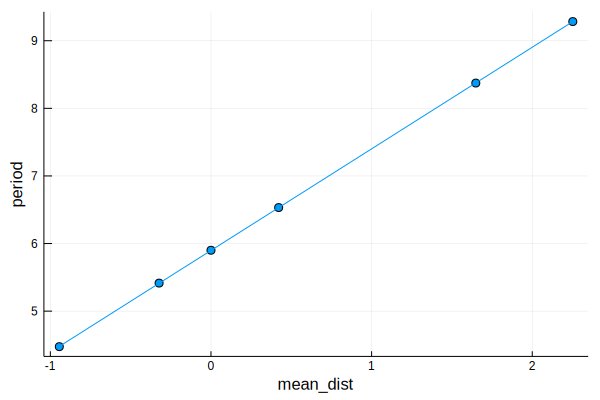

In [41]:
scatter(log.(planets.mean_dist), log.(planets.period), regression=true, xlabel="mean_dist", ylabel="period", legend=false)

We see a near-perfect linear relationship between the logged values of mean distance and period. What does this mean? Since we believe there's a linear relationship between the logged values, we can derive:

$$
\begin{aligned}
\log(period) &= m \log(dist) + b \\
period &= e^{m \log(dist) + b} & \text{Taking the exponent of both sides} \\
period &= e^b dist^m \\
period &= C \cdot dist^m
\end{aligned}
$$

We replaced $ e^b $ with $ C $ in the last step to represent $ e^b $ as a constant. The algebraic manipulation above shows that when two variables have a polynomial relationship, the log of the two variables has a linear relationship. In fact, we can find the degree of the polynomial by examining the slope of the line. In this case, the slope is 1.5 which gives us Kepler's third law: $ period \propto dist^{1.5} $.

By a similar derivation we can also show that if the relationship between the $ \log(y) $ and $ x $ is linear, the two variables have an exponential relationship: $ y = a^x $.

Thus, we can use the logarithm to reveal patterns in right-tailed data and common non-linear relationships between variables.

Other common data transformations include the Box-Cox transformation and polynomial transforms.

### Principles of Context

It is important to add as much relevant context as possible to any plot you plan to share more broadly. For example, the following plot shows its data clearly but provides little context to help understand what is being plotted.

![https://github.com/DS-100/textbook/raw/master/assets/viz_538_before.png](https://github.com/DS-100/textbook/raw/master/assets/viz_538_before.png)

To provide context, we add a title, caption, axes labels, units for the axes, and labels for the plotted lines.

![https://github.com/DS-100/textbook/raw/master/assets/viz_538_after.png](https://github.com/DS-100/textbook/raw/master/assets/viz_538_after.png)

([This blog post](https://www.dataquest.io/blog/making-538-plots/) explains how to make these modifications using `matplotlib`.)

In general, we provide context for a plot through:

- Plot title
- Axes labels
- Reference lines and markers for important values
- Labels for interesting points and unusual observations
- Captions that describe the data and its important features

### Principles of Smoothing

Smoothing allows us to more clearly visualize data when we have many data points. We've actually already seen an instance of smoothing: histograms are a type of smoothing for rug plots. A rug plot is a plot for a single quantitative variable, and displays marks along an axis. `Plots` doesn't currently support this specific type of plot, so we will once again use a recipe to create a similar visualization:

In [194]:
@userplot RugPlot
@recipe function f(rp::RugPlot, n::Integer = 1)
    data = rp.args[1]
    
    seriestype := :sticks
    ylims := (0, n)
    legend --> false
    y = fill(0.2, length(ti.age))
    data, y
end

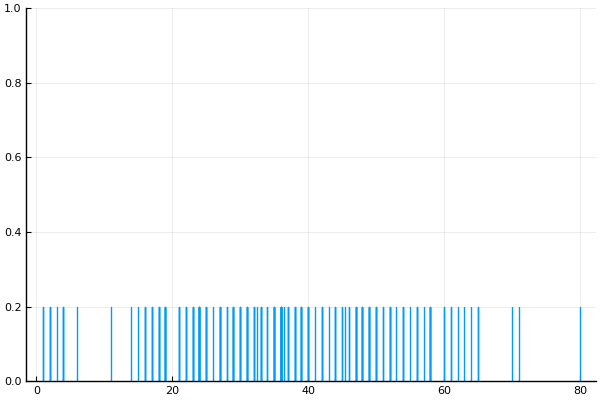

In [146]:
rugplot(ti.age)

There are many marks that make it difficult to tell where the data lie. In addition, some of the points overlap, making it impossible to see how many points lie at 0. This issue is called *overplotting* and we generally avoid it whenever possible.

To reveal the distribution of the data, we can replace groups of marks with a bar that is taller when more points are in the group. Smoothing refers to this process of replacing sets of points with appropriate markers; we choose not to show every single point in the dataset in order to reveal broader trends.

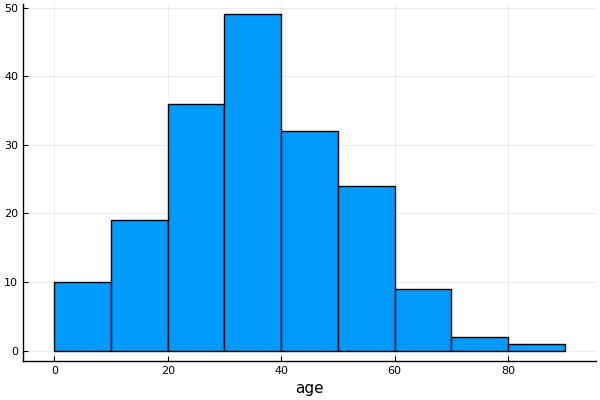

In [126]:
@df ti histogram(:age, legend=false, xlabel="age")

We've also seen that we can overlay our histogram with a plot of the density curve:

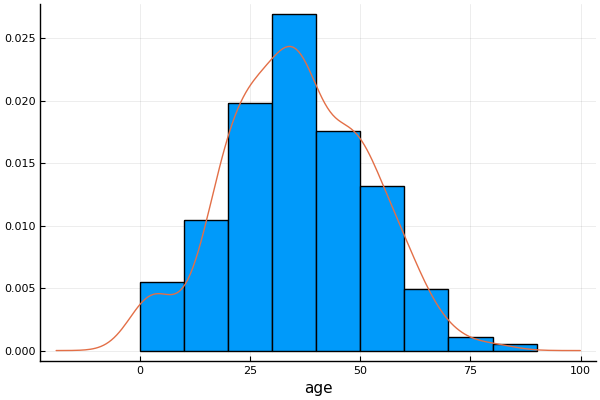

In [129]:
@df ti histogram(:age, legend=false, xlabel="age", norm=:pdf)
@df ti plot!(:age, seriestype=:density)

This is another form of smoothing called *kernel density estimation* (KDE). Instead of grouping points together and plotting bars, KDE places a curve on each point and combines the individual curves to create a final estimation of the distribution. Consider the rugplot below that shows three points.

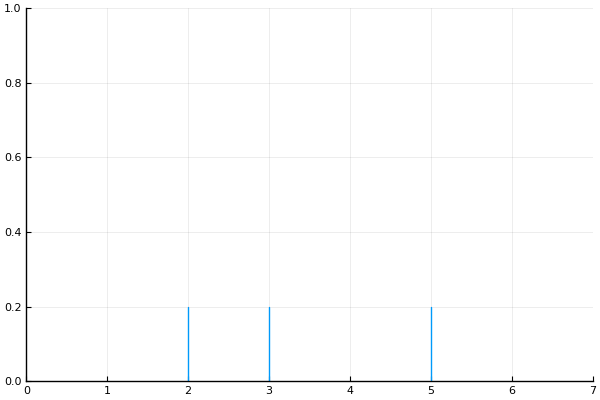

In [148]:
points = [2, 3, 5]
rugplot(points)
plot!(xlims=(0, 7))

To perform KDE, we place a Gaussian (normal) distribution on each point. For that, we will use the package `KernelDensity`:

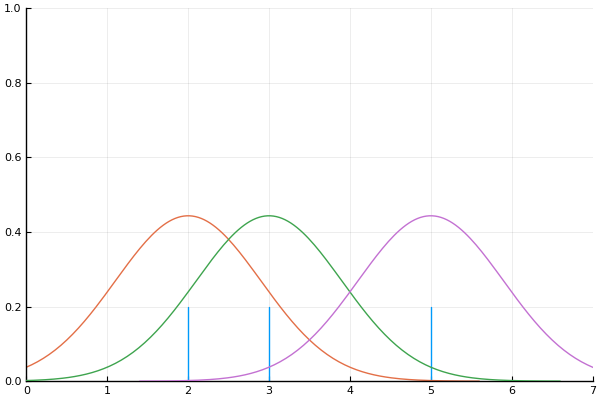

In [154]:
# HIDDEN

rugplot(points)
plot!(xlims=(0, 7))
plot!([points[1]], seriestype=:density)
plot!([points[2]], seriestype=:density)
plot!([points[3]], seriestype=:density)

The area under each Gaussian curve is equal to 1. Since we will sum multiple curves together, scaling each curve so that when added together the area under all the curves is equal to 1. This will result in a final smooth estimate for the distribution:

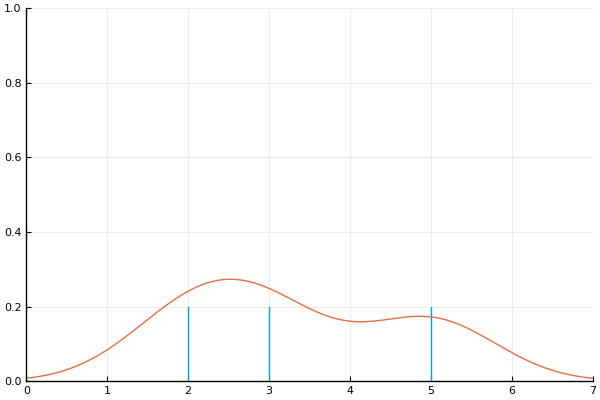

In [176]:
# HIDDEN

rugplot(points)
plot!(xlims=(0, 7))
plot!(points, seriestype=:density)

By following this procedure, we can use KDE to smooth many points.

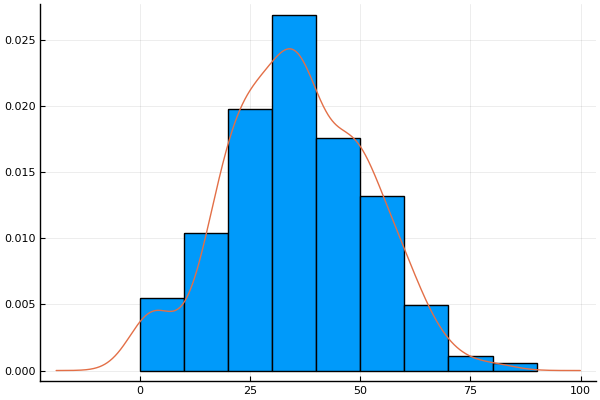

In [196]:
using KernelDensity

@df ti histogram(:age, norm=:pdf)
kde(ti.age) |> x -> plot!(x, legend=false)

#### Smoothing a Scatter Plot

We can also smooth two-dimensional plots when we encounter the problem of overplotting.

The following example comes from a dataset released by the Cherry Blossom Run, an annual 10-mile run in Washington D.C. Each runner can report their age and their race time; we've plotted all the reported data points in the scatter plot below.

In [219]:
runners = CSV.read("data/cherryBlossomMen.csv", missingstring="NA", ignoreemptylines=true)

,year,place,age,time
,Int64,Int64,Int64⍰,Int64⍰
1,1999,1,28,2819
2,1999,2,24,2821
3,1999,3,27,2823
4,1999,4,28,2827
5,1999,5,26,2851
⋮,⋮,⋮,⋮,⋮


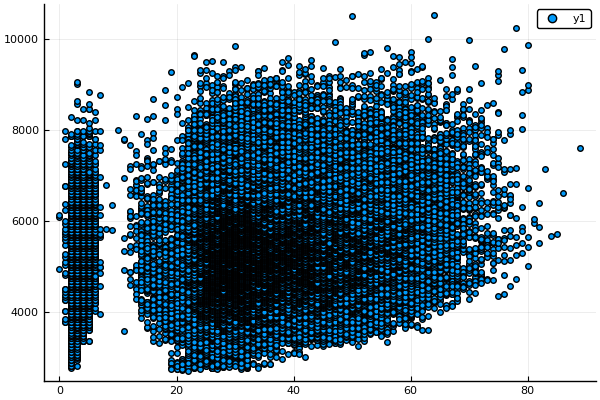

In [220]:
using StatsPlots
runners_sorted = sort(dropmissing(runners), :age)

So many points lie on top of each other that it's difficult to see any trend at all!

We can smooth the scatter plot using kernel density estimation in two dimensions. When KDE is applied to a two-dimensional plot, we place a three-dimensional Gaussian at each point. In three dimensions, the Gaussian looks like a mountain pointing out of the page.

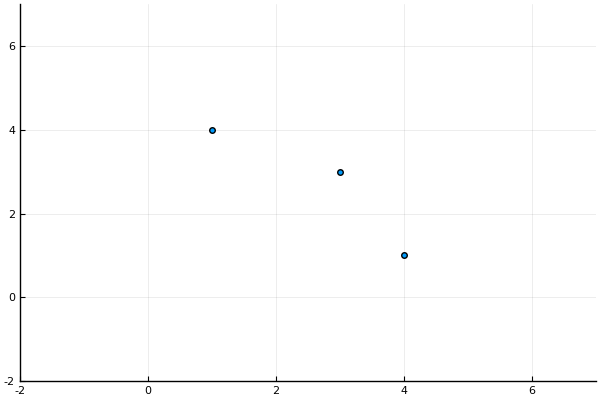

In [224]:
two_d_points = DataFrame(x = [1,3,4], y = [4,3,1])
@df two_d_points scatter(:x, :y, xlim=(-2, 7), ylim=(-2, 7), legend=false)

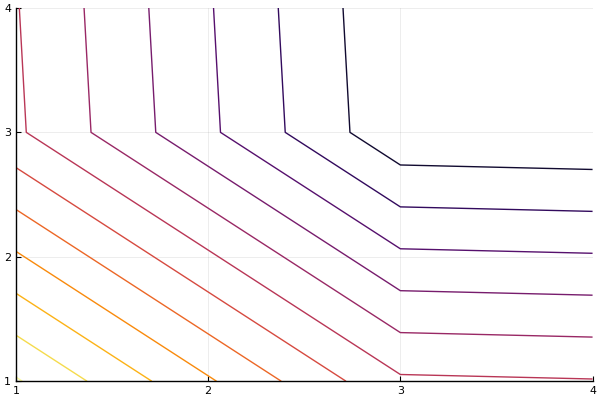

In [246]:
# FIX
f(x,y) = 1/sqrt(2π) * exp(-1/2 * x^2) + 1/sqrt(2π) * exp(-1/2 * y^2)
plot(two_d_points.x, two_d_points.y, f, seriestype=:contour, legend=false)